In [258]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats
import time
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
r = requests.get('http://www.baseball-almanac.com/players/ballplayer.shtml')

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
BeautifulSoup.prettify(soup)

'<html>\n <head>\n  <title>\n   The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac\n  </title>\n  <meta content="Baseball Players Ballplayers Encyclopedia baseball players ballplayers encyclopedia" name="keywords"/>\n  <meta content="The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac." name="description"/>\n  <meta content="Geisler Young, LLC - http://www.geisleryoung.com/" name="Author"/>\n  <link href="../basitewideV2.css" rel="stylesheet" type="text/css"/>\n </head>\n <body background="../images/ba_bg.jpg" bgcolor="#FFFFFF">\n  <div align="center">\n   <!-- BEGIN GOOGLE ADSENSE -->\n   <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">\n   </script>\n   <!-- Responsive -->\n   <ins class="adsbygoogle" data-ad-client="ca-pub-7150597730414049" data-ad-format="auto" data-ad-slot="6668602445" style="display:block">\n   </ins>\n   <script>\n    (adsbygoogle = window.adsbygoogle || []).push({});\n   </script>\n   <!-- END G

In [5]:
td_tags = soup.find_all('td', {'class':'datacolBoxC'})

In [6]:
td_tags_yellow = soup.find_all('td', {'class': 'datacolBoxYellowC'})

In [7]:
td_tags_yellow

[<td class="datacolBoxYellowC" nowrap=""><a href="player-b.shtml"><span style="font-weight:bold; font-size: 14px;">Bab-Bar</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=babbch01" title="Show stats for Charlie Babb">Babb</a><br/>to<br/><a href="player.php?p=barreto01" title="Show stats for Tommy Barrett">Barrett</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b2.shtml"><span style="font-weight:bold; font-size: 14px;">Bar-Bel</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=barrija01" title="Show stats for Jaime Barria">Barria</a><br/>to<br/><a href="player.php?p=belltr01" title="Show stats for Trevor Bell">Bell</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b3.shtml"><span style="font-weight:bold; font-size: 14px;">Bel-Bla</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=bellaze01" title="Show stats for Zeke Bella">Bella</a><br/>to<br/><a href="player.ph

In [8]:
link_list = []
for td in td_tags:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE


In [9]:
for td in td_tags_yellow:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE
NONE


In [10]:
link_list = sorted(link_list)

In [11]:
link_list[0]

'player-a.shtml'

In [12]:
player_list = []
for l in link_list:
    print(l, len(link_list))
    c = requests.get('http://www.baseball-almanac.com/players/' + l).content
    soup = BeautifulSoup(c)
    td_tags = soup.find_all('td', {'class':'datacolBox'})
    for td in td_tags:   
        if 'href' in str(td):
            player_url = td.find('a').get('href')
            player_name = td.find('a').get_text().strip()
            player_list.append({'url':player_url,
                                'name':player_name})

player-a.shtml 84


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/ethanarsht/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


player-a2.shtml 84
player-b.shtml 84


KeyboardInterrupt: 

In [ ]:
df_players = pd.DataFrame(player_list)

In [ ]:
df_players

In [ ]:
c = requests.get('http://www.baseball-almanac.com/players/player.php?p=abadfe01').content
soup = BeautifulSoup(c)

tables = soup.find_all('table', {'class':'boxed'})
for t in tables:
    if 'Totals' in str(t):
        print('this one')
        table = t

t_list = table.find_all('td', {'class' : 'datacolC'})
for td in t_list:
    if 'Totals' in str(td):
        pp = td.text.strip(' Totals')

In [ ]:
height_list = []
weight_list = []
name_list = []
url_list = []
firstyear_list = []
lastyear_list = []
pos_list = []
for i, row in df_players.iterrows():    
    print(str(i) + '/' + str(len(df_players)))
    c = requests.get('http://www.baseball-almanac.com/players/' + row['url']).content

    soup = BeautifulSoup(c)

    td_tags = soup.find_all('td', {'class':'biocolpad'})


    for i, td in enumerate(td_tags):
        if 'Height' in str(td):
            reference = i
            height_i = reference + 1

        if 'Weight' in str(td):
            weight_i = i + 1

    height = td_tags[height_i].get_text().strip()
    height_list.append(height)

    weight = td_tags[weight_i].get_text().strip()
    weight_list.append(weight)
    
    url_list.append(row['url'])
    name_list.append(row['name'])
    
    
#     grab first and last year
    tables = soup.find_all('table', {'class':'boxed'})

    r_list = []
    for t in tables:
        r = t.find_all('td', {'class':'datacolBoxC'})
        for td in r:
            r_list.append(td)

    del r_list[-1]

    year_list = []
    for r in r_list:
        if len(r.text) > 3:
            year_list.append(int(r.text))
    firstyear_list.append(year_list[0])
    lastyear_list.append(year_list[-1])
    

#     grab primary position
    for t in tables:
        if 'Totals' in str(t):
            table = t

    t_list = table.find_all('td', {'class' : 'datacolC'})
    for td in t_list:
        if 'Totals' in str(td):
            pp = td.text.strip(' Totals')
    pos_list.append(pp)



    

In [ ]:
    
df_h_w = pd.DataFrame(
    {
        'height':height_list,
        'weight':weight_list,
        'url':url_list,
        'name':name_list,
        'firstyear':firstyear_list,
        'lastyear':lastyear_list,
        'primary_pos': pos_list
             }
)

In [ ]:
df_h_w

In [ ]:
df_h_w.to_csv('player_hw.csv')

In [13]:
df_stats = pd.read_csv('player_hw.csv', index_col = 0)

In [14]:
df_stats['car_length'] = df_stats['lastyear'] - df_stats['firstyear']

In [15]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19132 entries, 0 to 19131
Data columns (total 8 columns):
height         19132 non-null object
weight         19132 non-null object
url            19132 non-null object
name           19132 non-null object
firstyear      19132 non-null int64
lastyear       19132 non-null int64
primary_pos    19132 non-null object
car_length     19132 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [16]:
df_stats = df_stats[df_stats.weight != 'Unknown']

In [17]:
df_stats.weight = df_stats.weight.astype('int64')

In [18]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.577366,0.585693,0.111505
firstyear,0.577366,1.000000,0.992700,0.013025
lastyear,0.585693,0.992700,1.000000,0.133531
car_length,0.111505,0.013025,0.133531,1.000000


In [19]:
df_stats = df_stats[df_stats['firstyear'] > 1959]

In [20]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.352283,0.381560,0.059728
firstyear,0.352283,1.000000,0.958648,-0.253493
lastyear,0.381560,0.958648,1.000000,0.032287
car_length,0.059728,-0.253493,0.032287,1.000000


In [21]:
df_stats = df_stats[df_stats['lastyear'] != 2018]

In [22]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.00000,0.329020,0.356810,0.059950
firstyear,0.32902,1.000000,0.951032,-0.237160
lastyear,0.35681,0.951032,1.000000,0.074729
car_length,0.05995,-0.237160,0.074729,1.000000


In [23]:

def inches(x):
    x = x.replace('½','')
    f_i = re.split('-', x)
    feet = int(f_i[0]) * 12
    inches = int(f_i[1])
    height = feet + inches
    return height

In [24]:
df_stats['height'] = df_stats.height.apply(inches)

In [25]:
df_stats['bmi'] = (df_stats['weight'] / df_stats['height'] / df_stats['height']) * 703

In [26]:
df_stats = df_stats.sort_values('bmi', ascending = False).reset_index(drop = True)

In [27]:
df_stats[df_stats['name'].str.contains('Colon')]

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
534,77,245,player.php?p=colonro01,Roman Colon,2004,2012,P,8,29.049587
2399,70,185,player.php?p=colonch01,Christian Colon,2014,2017,SS,3,26.541837
5670,72,180,player.php?p=colonjo01,Joe Colon,2016,2016,P,0,24.409722
7828,74,180,player.php?p=coloncr01,Cris Colon,1992,1992,SS,0,23.108108


In [28]:
df_stats.sort_values('car_length', ascending = False)

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
5268,74,195,player.php?p=ryanno01,Nolan Ryan,1966,1993,P,27,25.033784
4847,72,185,player.php?p=moyerja01,Jamie Moyer,1986,2012,P,26,25.087770
7711,75,185,player.php?p=johnto01,Tommy John,1963,1989,P,26,23.120889
1236,73,210,player.php?p=francju01,Julio Franco,1982,2007,RF,25,27.703134
876,74,220,player.php?p=fiskca01,Carlton Fisk,1969,1993,3B,24,28.243243
1318,74,215,player.php?p=morgami01,Mike Morgan,1978,2002,P,24,27.601351
1055,70,195,player.php?p=henderi01,Rickey Henderson,1979,2003,RF,24,27.976531
2911,74,205,player.php?p=oroscje01,Jesse Orosco,1979,2003,RF,24,26.317568
6132,74,190,player.php?p=houghch01,Charlie Hough,1970,1994,P,24,24.391892
1098,71,200,player.php?p=rosepe01,Pete Rose,1963,1986,CF,23,27.891291


In [29]:
df_pitchers = df_stats[df_stats['primary_pos'] == 'P']

In [30]:
df_pitchers.corr()

,height,weight,firstyear,lastyear,car_length,bmi
height,1.000000,0.562195,0.082419,0.094178,0.033953,-0.007475
weight,0.562195,1.000000,0.307290,0.341857,0.095597,0.821419
firstyear,0.082419,0.307290,1.000000,0.956249,-0.210943,0.315052
lastyear,0.094178,0.341857,0.956249,1.000000,0.084258,0.349168
car_length,0.033953,0.095597,-0.210943,0.084258,1.000000,0.093588
bmi,-0.007475,0.821419,0.315052,0.349168,0.093588,1.000000


In [31]:
df_p_obese = df_pitchers[df_pitchers['bmi'] > 30]

In [32]:
df_p_obese.car_length.mean()

5.295774647887324

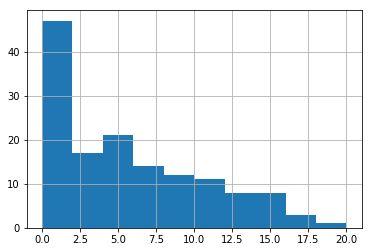

In [33]:
df_p_obese.car_length.hist()

In [34]:
df_p_fit = df_pitchers[df_pitchers['bmi'] <= 30]

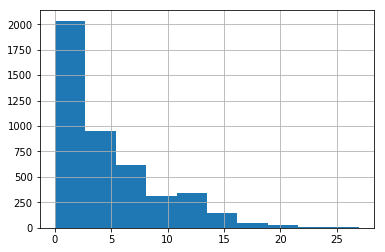

In [35]:
df_p_fit.car_length.hist()

In [36]:
df_p_fit.car_length.mean()

4.525333333333333

In [37]:
df_pitchers.reset_index(drop = True, inplace = True)

In [38]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,76,315,player.php?p=diazju03,Jumbo Diaz,2014,2017,P,3,38.338816
1,72,265,player.php?p=mijarjo01,Jose Mijares,2008,2013,P,5,35.936535
2,75,280,player.php?p=brittch01,Chris Britton,2006,2008,P,2,34.993778
3,76,285,player.php?p=broxtjo01,Jonathan Broxton,2005,2017,P,12,34.687500
4,72,255,player.php?p=machije01,Jean Machi,2012,2017,P,5,34.580440
5,76,280,player.php?p=silvaca01,Carlos Silva,2002,2010,P,8,34.078947
6,72,250,player.php?p=garceri01,Rich Garces,1990,2002,P,12,33.902392
7,75,270,player.php?p=jenksbo01,Bobby Jenks,2005,2011,P,6,33.744000
8,70,235,player.php?p=harrile01,Lenny Harris,1998,2005,P,7,33.715306
9,73,255,player.php?p=queveru01,Ruben Quevedo,2000,2003,P,3,33.639520


In [39]:
stats.ttest_ind(df_p_fit.car_length, df_p_obese.car_length, equal_var = False)

Ttest_indResult(statistic=-1.8736219164562633, pvalue=0.06293652884810132)

In [214]:
df_matcher = pd.read_csv('~/Downloads/people.csv')[['name_first', 'name_last', 'key_fangraphs']]

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
df_matcher.columns

Index(['name_first', 'name_last', 'key_fangraphs'], dtype='object')

In [216]:
df_matcher['name'] = (df_matcher['name_first'] + ' ' + df_matcher['name_last'])

In [217]:
df_matcher['name']

0         Evert-Jean 't Hoen
1                        NaN
2                  Al Aaberg
3               Kirk Aadland
4                 Zach Aaker
5                Zach Aakhus
6              Brady Aalbers
7             Brian Aanderud
8            Gerald Aanonsen
9                        NaN
10             David Aardsma
11                  Ed Aaron
12                Ging Aaron
13                Hank Aaron
14                Lary Aaron
15              Melvin Aaron
16              Robert Aaron
17                 Tom Aaron
18              Tommie Aaron
19               W. M. Aaron
20              Wilmer Aaron
21               Eric Aarons
22            Glenn Aaronson
23                  Don Aase
24               Kermit Aase
25                Cody Aasen
26                 Andy Abad
27            Che Yeyne Abad
28             Fernando Abad
29                Henry Abad
                 ...        
306362                   NaN
306363        Dutch Zwilling
306364                   NaN
306365        

In [218]:
df_matched = pd.merge(df_matcher, df_pitchers, how = 'outer', on = 'name').dropna(subset = ['height'])

In [219]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,76,315,player.php?p=diazju03,Jumbo Diaz,2014,2017,P,3,38.338816
1,72,265,player.php?p=mijarjo01,Jose Mijares,2008,2013,P,5,35.936535
2,75,280,player.php?p=brittch01,Chris Britton,2006,2008,P,2,34.993778
3,76,285,player.php?p=broxtjo01,Jonathan Broxton,2005,2017,P,12,34.687500
4,72,255,player.php?p=machije01,Jean Machi,2012,2017,P,5,34.580440
5,76,280,player.php?p=silvaca01,Carlos Silva,2002,2010,P,8,34.078947
6,72,250,player.php?p=garceri01,Rich Garces,1990,2002,P,12,33.902392
7,75,270,player.php?p=jenksbo01,Bobby Jenks,2005,2011,P,6,33.744000
8,70,235,player.php?p=harrile01,Lenny Harris,1998,2005,P,7,33.715306
9,73,255,player.php?p=queveru01,Ruben Quevedo,2000,2003,P,3,33.639520


In [228]:
df_matched.dropna(subset = ['height', 'name_first', 'key_fangraphs'], inplace = True)

In [232]:
df_matched.reset_index(drop = True, inplace = True)

In [302]:
df_matched[df_matched.name_last == 'Pichardo']

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
3377,Hipolito,Pichardo,1472.0,Hipolito Pichardo,73.0,185.0,player.php?p=pichahi01,1992.0,2002.0,P,10.0,24.405142


In [269]:

def war_scraper(name, player_id):
    global df_player
    
    f = requests.get('https://www.fangraphs.com/statss.aspx?playerid={}'.format(player_id))
    
    f_soup = BeautifulSoup(f.content.decode('utf-8'), 'html.parser')

    tables = f_soup.find_all('table', {'class': 'rgMasterTable', 'id': 'SeasonStats1_dgSeason11_ctl00'})

    war_table = tables[0]

    trs = war_table.find_all('tr')

    for tr in trs:

        if tr:
            tds = tr.find_all('td')
            if tds:
                if tds[-1].text != '\xa0': 
                    df_list.append(
                    {
                        'year': tds[0].text,
                        'war': tds[-1].text,
                        'team': tds[1].text,
                        'name': name
                    })
    df_player = pd.DataFrame(df_list)
    
    df_player = df_player[~df_player['team'].str.contains('Depth Charts|Steamer|Fans|Zips|ZiPS|- - -')]
    
    df_player = df_player.drop_duplicates(subset = ['name','year'], keep = 'first').reset_index(drop = True)
    
    df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [303]:
df_list = []
for name, key, n in zip(df_matched.name[3377:], df_matched.key_fangraphs[3377:], range(0, len(df_matched))):
    print(name)
    print(str(n) + '/' + str(len(df_matched)))
    war_scraper(name, key)

Hipolito Pichardo
0/4831
Ron Piche
1/4831
Ricky Pickett
2/4831
Kevin Pickford
3/4831
Jeff Pico
4/4831
Ed Pierce
5/4831
Jeff Pierce
6/4831
Tony Pierce
7/4831
Chris Piersoll
8/4831
Carmen Pignatiello
9/4831
Tyler Pill
10/4831
Stolmy Pimentel
11/4831
Horacio Pina
12/4831
Branden Pinder
13/4831
Luis Pineda
14/4831
Michael Pineda
15/4831
Joel Pineiro
16/4831
Yohan Pino
17/4831
Renyel Pinto
18/4831
Ricardo Pinto
19/4831
Gerry Pirtle
20/4831
Marc Pisciotta
21/4831
Skip Pitlock
22/4831
Jim Pittsley
23/4831
Gordie Pladson
24/4831
Ed Plank
25/4831
Erik Plantenberg
26/4831
Bill Pleis
27/4831
Dan Plesac
28/4831
Tim Plodinec
29/4831
Eric Plunk
30/4831
Jeff Plympton
31/4831
Dick Pole
32/4831
Cliff Politte
33/4831
Dale Polley
34/4831
John Poloni
35/4831
Stu Pomeranz
36/4831
Sidney Ponson
37/4831
Jim Poole
38/4831
Jim Poole
39/4831
Aaron Poreda
40/4831
Chuck Porter
41/4831
Mark Portugal
42/4831
Mike Porzio
43/4831
Lou Pote
44/4831
Mike Potts
45/4831
Max Povse
46/4831
Brian Powell
47/4831
Dennis Powell

Vern Ruhle
373/4831
Jose Ruiz
374/4831
Rich Rundles
375/4831
Sean Runyan
376/4831
Dan Runzler
377/4831
Josh Rupe
378/4831
Ryan Rupe
379/4831
Glendon Rusch
380/4831
Scott Ruskin
381/4831
Adam Russell
382/4831
James Russell
383/4831
Jeff Russell
384/4831
John Russell
385/4831
John Russell
386/4831
Dick Rusteck
387/4831
Dick Ruthven
388/4831
Brendan Ryan
389/4831
Jason Ryan
390/4831
Ken Ryan
391/4831
Kyle Ryan
392/4831
Nolan Ryan
393/4831
Gary Ryerson
394/4831
Jae Kuk Ryu
395/4831
Kirk Saarloos
396/4831
Erik Sabel
397/4831
Bret Saberhagen
398/4831
Brian Sackinsky
399/4831
Ray Sadecki
400/4831
Billy Sadler
401/4831
Carl Sadler
402/4831
Casey Sadler
403/4831
Bob Sadowski
404/4831
Bob Sadowski
405/4831
Jim Sadowski
406/4831
Ryan Sadowski
407/4831
Ted Sadowski
408/4831
Chris Saenz
409/4831
Mike Saipe
410/4831
Takashi Saito
411/4831
Juan Salas
412/4831
Marino Salas
413/4831
Danny Salazar
414/4831
Luis Salazar
415/4831
Roger Salkeld
416/4831
Brad Salmon
417/4831
Joe Sambito
418/4831
Bill Sampen

Cliff Speck
747/4831
Justin Speier
748/4831
Ryan Speier
749/4831
Levale Speigner
750/4831
Josh Spence
751/4831
Sean Spencer
752/4831
Stan Spencer
753/4831
Scott Spiezio
754/4831
Dan Spillner
755/4831
Scipio Spinks
756/4831
Paul Splittorff
757/4831
Paul Spoljaric
758/4831
Tim Spooneybarger
759/4831
Jerry Spradlin
760/4831
Ed Sprague
761/4831
Ed Sprague
762/4831
Dennis Springer
763/4831
Russ Springer
764/4831
Bob Sprout
765/4831
Bobby Sprowl
766/4831
Zeke Spruill
767/4831
Jay Spurgeon
768/4831
Chris Spurling
769/4831
Mike Squires
770/4831
Randy St. Claire
771/4831
George Stablein
772/4831
Bill Stafford
773/4831
Tracy Stallard
774/4831
Jason Standridge
775/4831
Al Stanek
776/4831
Kevin Stanfield
777/4831
Jason Stanford
778/4831
Daniel Stange
779/4831
Lee Stange
780/4831
Don Stanhouse
781/4831
Rob Stanifer
782/4831
Bob Stanley
783/4831
Mike Stanton
784/4831
Mike Stanton
785/4831
Mike Stanton
786/4831
Mike Stanton
787/4831
Dave Stapleton
788/4831
Dave Stapleton
789/4831
Denny Stark
790/4831

Jamie Vermilyea
1106/4831
Logan Verrett
1107/4831
Bob Veselic
1108/4831
Thyago Vieira
1109/4831
Eduardo Villacis
1110/4831
Brandon Villafuerte
1111/4831
Carlos Villanueva
1112/4831
Elih Villanueva
1113/4831
Henry Villar
1114/4831
Brayan Villarreal
1115/4831
Oscar Villarreal
1116/4831
Pedro Villarreal
1117/4831
Ismael Villegas
1118/4831
Ron Villone
1119/4831
Dave Vineyard
1120/4831
Ken Vining
1121/4831
Frank Viola
1122/4831
Pedro Viola
1123/4831
Joe Vitko
1124/4831
Luis Vizcaino
1125/4831
Ryan Vogelsong
1126/4831
Edinson Volquez
1127/4831
Bruce Von Hoff
1128/4831
Dave Von Ohlen
1129/4831
Ed Vosberg
1130/4831
Brad Voyles
1131/4831
Pete Vuckovich
1132/4831
Tsuyoshi Wada
1133/4831
Jason Waddell
1134/4831
Tom Waddell
1135/4831
Cory Wade
1136/4831
Terrell Wade
1137/4831
Doug Waechter
1138/4831
Billy Wagner
1139/4831
Gary Wagner
1140/4831
Hector Wagner
1141/4831
Mark Wagner
1142/4831
Matt Wagner
1143/4831
Neil Wagner
1144/4831
Paul Wagner
1145/4831
Ryan Wagner
1146/4831
Tyler Wagner
1147/4831

In [304]:
df_player_saved = pd.concat([df_player_saved, df_player])

In [289]:
df_player

,name,team,war,year
0,Manny Banuelos,Braves,-0.2,2015
1,Travis Baptist,Twins,-0.3,1998
2,Brian Barber,Cardinals,0.0,1995
3,Brian Barber,Cardinals,-0.1,1996
4,Brian Barber,Royals,0.6,1998
5,Brian Barber,Royals,-0.5,1999
6,Steve Barber,Twins,0.0,1970
7,Steve Barber,Twins,-0.4,1971
8,Steve Barber,Orioles,1.7,1960
9,Steve Barber,Orioles,3.5,1961


In [306]:
df_player_saved.to_csv('pitcher_war.csv')

In [307]:
df_player_saved.to_csv('~/Downloads/pitcher_war.csv')

In [155]:
df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')